# PGA tour EDA - A look back at the last 10 years on the PGA tour.

As an avid golf fan and asipring data scientist, I've always been intrigued by what makes professional golfers as good as they are. As part of my data science learning adventure I learned how to use python libraries like beautifulsoup and regular expressions to scrape websites for data. Using this knowledge I was able to scrape player statistics from the pgatour.com website from 2007-2017. The web scraper can be seen in the "PGAtour.com Web Scraper" notebook located in this repository.

This goal of this notebook is to perform exploratory data analysis on the data scraped from the pgatour.com website. Exploratory data analysis is an open ended process that allows us to understand what the data is telling us through calculating statistics and creating charts and figures. This notebook will focus on the following:
<ul>
<li>Gather foundational knowledge of our dataset which would include distribution of features, summary statistics of features, feature datatypes, missing values, etc.</li>
<li>Discover outliers, anomalies and inconsistencies in the data</li>
<li>Find relationships and trends between various features of our data</li>
<li>Understand how time has impacted the PGA tour.</li>
</ul>

Ultimately, this dataset provides an opportunity to ask questions about how the PGA tour has evolved over time, including questions about scoring statistics, payment statistics and different nationalities of golfers.

# <a id='TOC'>Table of Contents</a>
<ol>
<li><a href='#section 1'>Understanding the Data</a></li>
<li><a href='#section_2'>Dataset Baseline Knowledge</a></li>
<li><a href='#section_3'>Exploratory Data Analysis - PGA tour through time</a></li>
<li><a href='#section_4'>Exploratory Data Analysis - Relationships between features</a></li>
<li><a href='#section_5'>Extra EDA</a></li>
<li><a href='#section_5'>Conclusion</a></li>



</ol>

# 1. <a id='section_1'>Understanding the Data</a>
<a href='#TOC'>Back to table of Contents</a>

The file pgatour.csv has 2044 rows and 14 columns. Each row corresponds to an individual golfer and their stats collected for a particular PGA tour season. The columns are:

<ul>
<li>NAME - Name of the golfer.</li>
<li>ROUNDS - Number of PGA tour rounds played in that year by that particular player.</li>
<li>SCORING - Average score per round played for that year. According to the PGAtour.com website, this metric is an adjusted scoring average, which takes into account the strength of the field for each event.</li>
<li>DRIVE_DISTANCE - The average number of yards per measured drive. Drives are measured on two holes per round and holes are selected that face in opposite directions to counteract the effect of wind. Drives are measured to the point at which they come to rest regardless of whether they are in the fairway or not.</li>
<li>FWY_% - The percentage of time a tee shot comes to rest in the fairway (regardless of club).</li>
<li>GIR_% - The percent of time a player was able to hit the green in regulation. A green is considered hit in regulation if any portion of the ball is touching the putting surface after the GIR stroke has been taken. The GIR stroke is determined by subtractin 2 from par on a hole (1st stroke on a par 3, 2nd on a par 4, 3rd on a par 5).</li>
<li>SG_P (Strokes gained putting) - The number of putts a player takes from a specific distance is measures against a statistical baseline to determine the player's stroked gained or lost on a hole. The sum of the values for all holes played in a round minus the field average stroked gained/lost for the round is the player's strokes gained/lost for that round. The sum of strokes gained for each round are then divided by total rounds played.</li>
<li>SG_TTG (Strokes gained tee to green) - The per round average of the number of strokes the player was better or worse than the field average on the same course & event minus the player's strokes gained putting value.</li>
<li>SG_T (Strokes Gained Total) - The per round average of the number of strokes the player was better or worse than the field average on the same course & event.</li>
<li>POINTS - The cumulative points the player has earned in the FedEx Cup points race for the year played.</li>
<li>TOP_10 - Number of top 10 finishes the player earned for the year played.</li>
<li>1ST - Number of wins the player earned for the year played.</li>
<li>Year - Year of PGA tour season</li>
<li>MONEY - PGA tour earnings from the season specified.</li>
<li>COUNTRY - Home country for player.</li>
</ul>

The strokes gained statistics are somewhat complex in how they are calculated but have drastically changed how players assess their own performance. For more information on the strokes gained statistic I would recommend reading this article https://www.golfdigest.com/story/do-the-pga-tour-strokes-gained-statistics-have-a-sample-size-problem-shane-ryan.






# 2. <a id='section_2'>Dataset Baseline Knowledge</a>
<a href='#TOC'>Back to table of Contents</a>

### Imports
Will be using numpy, pandas, matplotlib, seaborn to complete this project. 

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the data
The data for this project is contained in a sqlite3 database file located in this repository. I will use that module to read in the data as a dataframe.

In [28]:
#Load sqlite package
import sqlite3 as db
#Create connect object with example db. A new file will be created.
conn = db.connect('pgatour_raw.db')

#Create cursor to perform actions on db.
c = conn.cursor()

#Query pgatour_stats sqlite3 database created previously.
df = pd.read_sql_query("select * from pgatour_stats_raw;", conn).drop('index', axis=1).set_index('NAME').reset_index()


In [29]:
#Close connection
conn.close()

### Inspecting the data for missing values and data types.

In [30]:
df.head()

,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,Year,MONEY,COUNTRY
0,Aaron Baddeley,83,70.088,291.9,60.00,60.35,.629,.435,1.064,"17,703",7,1,2007,"$3,441,119",AUS
1,Adam Scott,69,70.008,300.9,59.17,65.44,.129,1.105,1.234,"15,630",6,1,2007,"$3,413,185",AUS
2,Alex Cejka,80,70.437,288.9,68.08,69.44,-.479,1.207,.728,"2,400",4,,2007,"$868,303",GER
3,Anders Hansen,55,70.856,280.7,66.95,62.85,-.176,.087,-.089,"1,989",None,None,2007,"$461,216",DEN
4,Andrew Buckle,77,71.443,294.7,58.14,62.52,.161,-.426,-.265,"1,875",1,,2007,"$513,630",AUS


In [31]:
print(df.shape)

(2044, 15)


This dataset has 2044 observations and 15 columns. Upon quick glance I notice the money column has dollar signs and commas and the points column has commas as well. We will need to clean these columns of those kinds of symbols.

In [32]:
#Clean money column
df['MONEY'] = df['MONEY'].apply(lambda x: x.replace(',', ''))
df['MONEY'] = df['MONEY'].apply(lambda x: x.replace('$', ''))

#Clean points column
df['POINTS'] = df['POINTS'].apply(lambda x: x.replace(',',''))

In [33]:
#Check that columns are cleaned
df.head()

,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,Year,MONEY,COUNTRY
0,Aaron Baddeley,83,70.088,291.9,60.00,60.35,.629,.435,1.064,17703,7,1,2007,3441119,AUS
1,Adam Scott,69,70.008,300.9,59.17,65.44,.129,1.105,1.234,15630,6,1,2007,3413185,AUS
2,Alex Cejka,80,70.437,288.9,68.08,69.44,-.479,1.207,.728,2400,4,,2007,868303,GER
3,Anders Hansen,55,70.856,280.7,66.95,62.85,-.176,.087,-.089,1989,None,None,2007,461216,DEN
4,Andrew Buckle,77,71.443,294.7,58.14,62.52,.161,-.426,-.265,1875,1,,2007,513630,AUS


We can see that the money and points columns are cleaned.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2044 entries, 0 to 2043
Data columns (total 15 columns):
NAME              2044 non-null object
ROUNDS            2044 non-null object
SCORING           2044 non-null object
DRIVE_DISTANCE    2044 non-null object
FWY_%             2044 non-null object
GIR_%             2044 non-null object
SG_P              2044 non-null object
SG_TTG            2044 non-null object
SG_T              2044 non-null object
POINTS            2044 non-null object
TOP 10            1692 non-null object
1ST               1692 non-null object
Year              2044 non-null object
MONEY             2044 non-null object
COUNTRY           2044 non-null object
dtypes: object(15)
memory usage: 239.6+ KB


All 15 columns are listed as datatype 'object' which indicates the data is in text or non-numeric form. We will want to change some of these categories to numeric. Also notice that the TOP 10 and 1ST columns have some missing values.


Next I'm going to use the .describe() method to see which columns I should change to numeric. The "include=['O']" allows the .decribe() methods to only look at columns with the data type 'object'. At this point all of the columns in the dataset are of type 'object' so this will provide a view into the whole dataset. 

I'm going to decide which columns to turn to numeric based on how many unique values they have. If a column has a large number of unique values I'm going to turn it to numeric as this is most likely a continuous variable and would serve our dataset best as being considered a numeric value. 

In [35]:
#Let's look at each colum
df.describe(include=['O'])

,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,Year,MONEY,COUNTRY
count,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,1692,1692,2044,2044,2044
unique,478,74,1405,402,1280,865,1061,1329,1353,1288,14,8,11,2042,29
top,Brandt Snedeker,81,70.954,288.1,65.36,66.67,-.028,-.443,-.004,565,1,,2007,1168073,USA
freq,11,64,8,18,6,27,8,7,6,7,437,1321,195,2,1405


I'm going to turn all columns except for Name, TOP 10, 1ST, YEAR AND COUNTRY because these columns have a low number of unique values. 

In [36]:
#Turn columns to numeric
df[['ROUNDS', 'SCORING', 'DRIVE_DISTANCE',
       'FWY_%', 'GIR_%', 'SG_P', 'SG_TTG', 'SG_T', 'POINTS', 'MONEY']] = df[['ROUNDS', 'SCORING', 'DRIVE_DISTANCE',
       'FWY_%', 'GIR_%', 'SG_P', 'SG_TTG', 'SG_T', 'POINTS', 'MONEY']].apply(pd.to_numeric)

In [37]:
#Check .info() method to make sure columns are of correct datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2044 entries, 0 to 2043
Data columns (total 15 columns):
NAME              2044 non-null object
ROUNDS            2044 non-null int64
SCORING           2044 non-null float64
DRIVE_DISTANCE    2044 non-null float64
FWY_%             2044 non-null float64
GIR_%             2044 non-null float64
SG_P              2044 non-null float64
SG_TTG            2044 non-null float64
SG_T              2044 non-null float64
POINTS            2044 non-null int64
TOP 10            1692 non-null object
1ST               1692 non-null object
Year              2044 non-null object
MONEY             2044 non-null int64
COUNTRY           2044 non-null object
dtypes: float64(7), int64(3), object(5)
memory usage: 239.6+ KB


All columns except for Country, Year, 1st, top10 and name were changed to either type "float64" or "int64" which represent numeric columns.

The last step in this cleaning process is to take care of the missing values in the TOP 10 and 1ST columns. Looking at the head of the dataframe above I noticed the 1ST column had some blank values and both the 1ST and TOP 10 columns had null values. I took a look at the webpage I scraped these columns from and noticed that the blank values or none values represent players that either did not have a top 10 finish or a win for that season. For that reason, I'm going to replace these blank values with zeros in text form because these columns are of type "object".

In [43]:
#Replace null and blank values with '0'
df.fillna('0', inplace=True)
df.replace('', '0', inplace=True)
df.head()

,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,Year,MONEY,COUNTRY
0,Aaron Baddeley,83,70.088,291.9,60.00,60.35,0.629,0.435,1.064,17703,7,1,2007,3441119,AUS
1,Adam Scott,69,70.008,300.9,59.17,65.44,0.129,1.105,1.234,15630,6,1,2007,3413185,AUS
2,Alex Cejka,80,70.437,288.9,68.08,69.44,-0.479,1.207,0.728,2400,4,0,2007,868303,GER
3,Anders Hansen,55,70.856,280.7,66.95,62.85,-0.176,0.087,-0.089,1989,0,0,2007,461216,DEN
4,Andrew Buckle,77,71.443,294.7,58.14,62.52,0.161,-0.426,-0.265,1875,1,0,2007,513630,AUS


In [47]:
#Check data for missing values
missing_vals = df.isnull().sum().sum()
blank_vals = sum(df['1ST'] == '') + sum(df['1ST'] == '')

print("The data now has {} null values and {} blank entries".format(missing_vals, blank_vals))

The data now has 0 null values and 0 blank entries


Now that are dataset is cleaned up a bit we can take a look at the distributions of each columns for outliers.

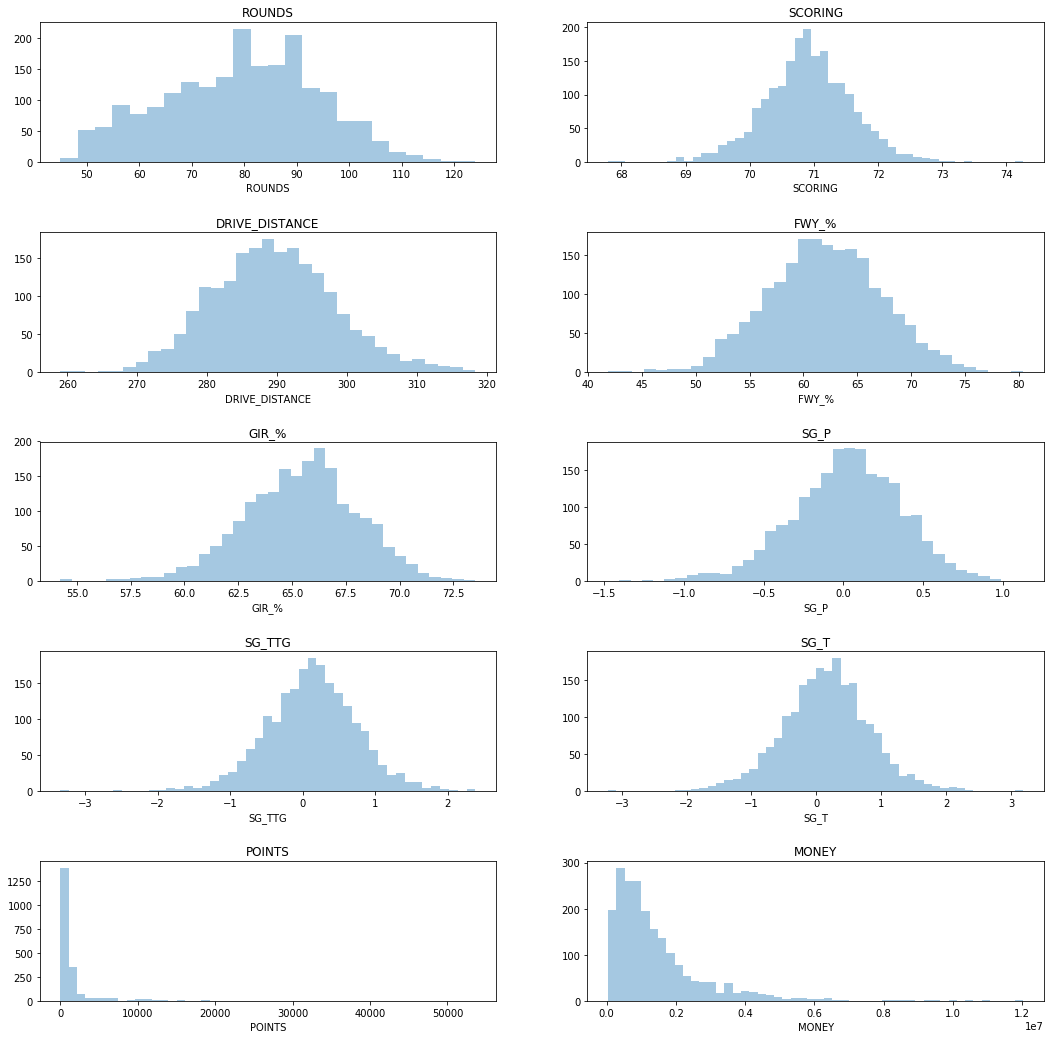

In [59]:
f, ax = plt.subplots(nrows = 5, ncols = 2, figsize=(18,18))
numeric_cols = df.select_dtypes(['int64', 'float64']).columns
row = 0
col = 0
for i, column in enumerate(numeric_cols):
    g = sns.distplot(df[column], ax=ax[row][col], kde=False)
    g.set(title = column)
    col += 1
    if col == 2:
        col = 0
        row += 1
        
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)

Observations:
<ul>
<li>ROUNDS, SCORING, FWY%, GIR%, SG_P, SG_TTG, SG_T are all roughly normally distributed.</li>
<li>POINTS and MONEY are heavily right-skewed.</li>

</ul>

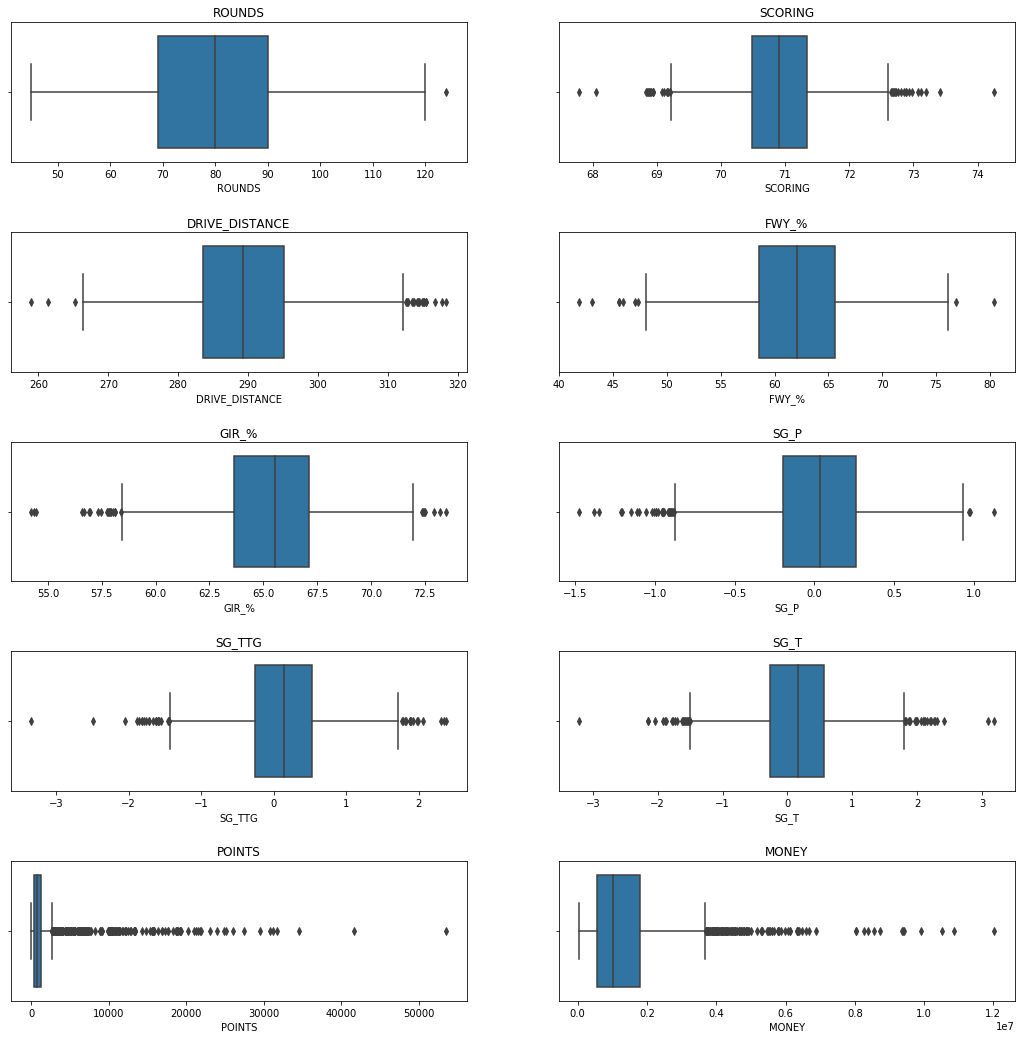

In [60]:
f, ax = plt.subplots(nrows = 5, ncols = 2, figsize=(18,18))
numeric_cols = df.select_dtypes(['int64', 'float64']).columns
row = 0
col = 0
for i, column in enumerate(numeric_cols):
    g = sns.boxplot(df[column], ax=ax[row][col])
    g.set(title = column)
    col += 1
    if col == 2:
        col = 0
        row += 1
        
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)

These boxplots appear as I would expect them to except for the POINTS boxplot. The median POINTS value appears to be around 2000 yet there are a significant number of outliers present. I'm going to investigate these points to understand why there are so many high points values.

---Years where large point totals present-----

2008    106
2007     68
Name: Year, dtype: int64 

----- Average point totals by year -----

Year
2007    5236.394872
2008    7741.164948
2009     683.686813
2010     662.661376
2011     685.318919
2012     677.582011
2013     706.698324
2014     801.528409
2015     705.420765
2016     695.945652
2017     577.723404
Name: POINTS, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


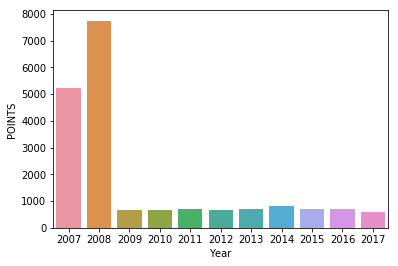

In [79]:
print('---Years where large point totals present-----\n')
print(df[df['POINTS'] > 5000].Year.value_counts(), '\n')
print('----- Average point totals by year -----\n')
print(df.groupby('Year').mean()['POINTS'])
print(sns.barplot(x = df.groupby('Year').mean()['POINTS'].index, y = df.groupby('Year').mean()['POINTS']))

It turns out the abnormally high points values come from the 2007 and 2008 seasons. After doing some research I discovered the way that the FED EX cup points were awarded to players changed in the 2009 season, hence why there is such a big difference in points awarded from the 2008 season to the 2009 season. To account for this, I'm going to create a dataframe called df_09_17 that contains all data from 2009 forward

In [76]:
#Create new dataframe to house data from 2009-2017
df_09_17 = df[~df['Year'].isin(['2007', '2008'])]
print(df_09_17['Year'].value_counts())

2010    189
2012    189
2017    188
2011    185
2016    184
2015    183
2009    182
2013    179
2014    176
Name: Year, dtype: int64


The new dataframe contains the data from 2009 onward.

In [79]:
df.describe()

,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,MONEY
count,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2044.000000,2.044000e+03
mean,79.355186,70.912630,289.540068,62.036404,65.412480,0.022556,0.129178,0.151788,1790.963796,1.419303e+06
std,14.604295,0.681575,8.710074,5.209013,2.650798,0.351150,0.621524,0.675791,3833.522276,1.325270e+06
min,45.000000,67.794000,259.000000,41.860000,54.230000,-1.475000,-3.340000,-3.209000,6.000000,4.546000e+04
25%,69.000000,70.490500,283.600000,58.510000,63.640000,-0.194000,-0.259500,-0.262500,360.000000,5.564188e+05
50%,80.000000,70.899000,289.300000,62.040000,65.560000,0.036000,0.140500,0.157500,659.000000,1.016720e+06
75%,90.000000,71.338750,295.200000,65.605000,67.122500,0.261000,0.528000,0.564250,1272.000000,1.809302e+06
max,124.000000,74.262000,318.400000,80.420000,73.520000,1.130000,2.380000,3.189000,53607.000000,1.203046e+07


We can see some summary statistics about the numeric features in the dataset. One thing to note is the different magnitudes of measure for the features. MONEY has a mean value of rougly 1.4 million dollars where the SG_P feature has a mean of 0.02.

# 3. <a id='section_3'>Exploratory Data Analysis - PGA tour through time</a>
<a href='#TOC'>Back to table of Contents</a>

Now I'm going to take a look at varoius PGA tour statics and how they have varied over time.

### Scoring Average Over Time

Text(0.5,1,'Scoring Averages Since 2010 on PGA Tour')

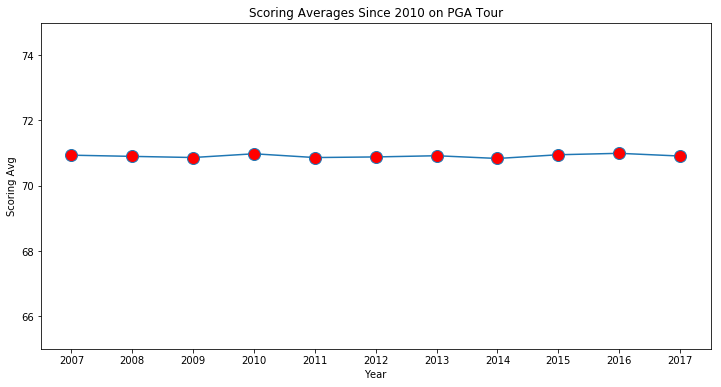

In [85]:
plt.figure(figsize=(12, 6))
plt.plot(df.groupby('Year').mean()['SCORING'], marker='o', markerfacecolor='red', markersize = 12)
plt.xlabel('Year')
plt.ylim(ymin = 65, ymax=75)
plt.ylabel('Scoring Avg')
plt.title('Scoring Averages Since 2010 on PGA Tour')

Observations: Scoring Average for players on the PGA tour has not varied too significantly over the 11 year span represented by this dataset. The highest scoring averages comes in years 2010 and 2016 at about 71 strokes/round, and the lowest coming in 2014 with roughly 70.825 strokes per round.


### FED EX Cup Points Over Time Separated by avg drivers over 300 yards and not over 300 yards

### Fedex Cup Points over time.
This chart will exclude the years of 2007 and 2008 because those years the fedex cup points were calculated differently than they were from 2009-2017.

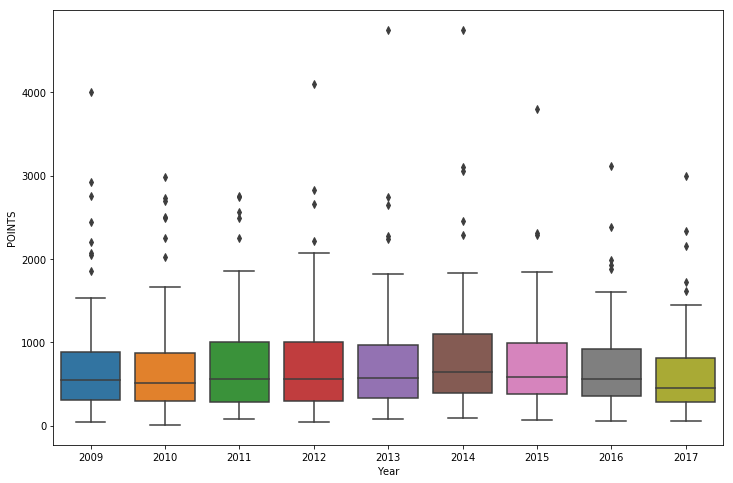

In [87]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='POINTS', data=df_09_17)

Observations: Fedex cup points have stayed relatively consistent from 2009-2017.

### Average Driving Distance Over Time

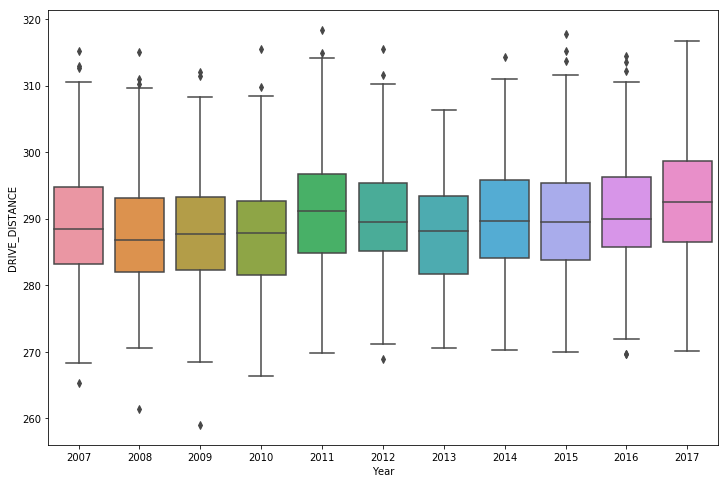

In [88]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='DRIVE_DISTANCE', data=df)

In [91]:
avg_driving_distance = df.groupby('Year').mean()['DRIVE_DISTANCE']
print('--- Average Driving Distance For Each Year ---')
avg_driving_distance

--- Average Driving Distance For Each Year ---


Year
2007    289.066154
2008    287.501031
2009    288.048901
2010    287.639683
2011    291.116757
2012    290.046561
2013    287.843575
2014    289.920455
2015    290.206011
2016    290.946196
2017    292.663830
Name: DRIVE_DISTANCE, dtype: float64

Observations: Average driving distance has varied but showed a general increase over time. Average driving distance has increased from 289 in 2007 to 292 in 2017.

### Fairways Hit % Over Time

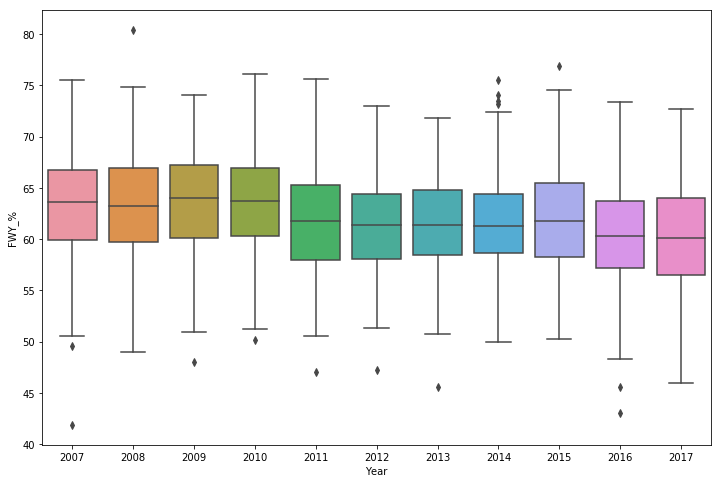

In [92]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='FWY_%', data=df)

In [94]:
avg_FWY = df.groupby('Year').mean()['FWY_%']
print('--- Average Fairways Hit % For Each Year ---')
avg_FWY

--- Average Fairways Hit % For Each Year ---


Year
2007    63.473590
2008    63.438711
2009    63.546758
2010    63.385079
2011    61.776216
2012    61.129153
2013    61.313184
2014    61.576761
2015    61.892350
2016    60.254293
2017    60.452074
Name: FWY_%, dtype: float64

Observations. We see a general decline in average yearly fairways hit % over the years in this dataset. The average yearly fairways hit % was 63.5% in 2007 and has declined to 60.45% in 2017. 

### Greens hit in Regulation % Over Time

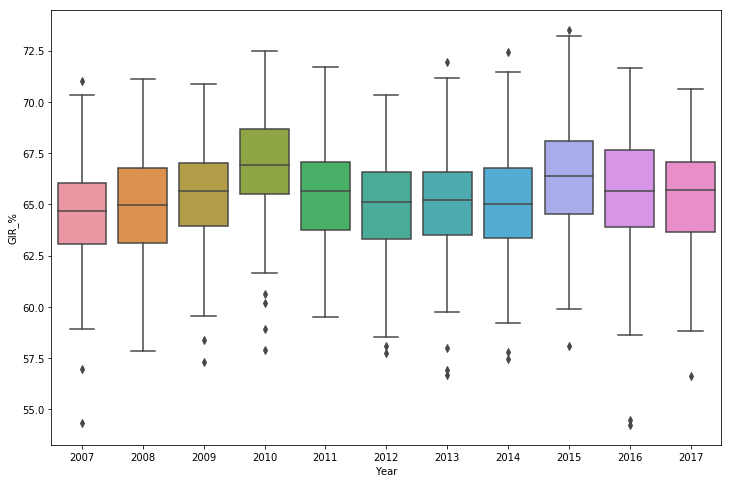

In [95]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='GIR_%', data=df)

In [96]:
avg_GIR = df.groupby('Year').mean()['GIR_%']
print('--- Average Greens in Regulation % For Each Year ---')
avg_GIR

--- Average Greens in Regulation % For Each Year ---


Year
2007    64.550564
2008    64.814948
2009    65.481044
2010    66.969788
2011    65.540162
2012    64.942116
2013    64.982682
2014    64.975114
2015    66.288907
2016    65.566359
2017    65.453298
Name: GIR_%, dtype: float64

Observations: Average GIR% has not varied much over time. GIR% was 64.55 in 2007 and increased to 65.45% in 2017. Average yearly GIR% has not gone below 64% or above 65% in that time frame.

### Strokes Gained Putting Over Time

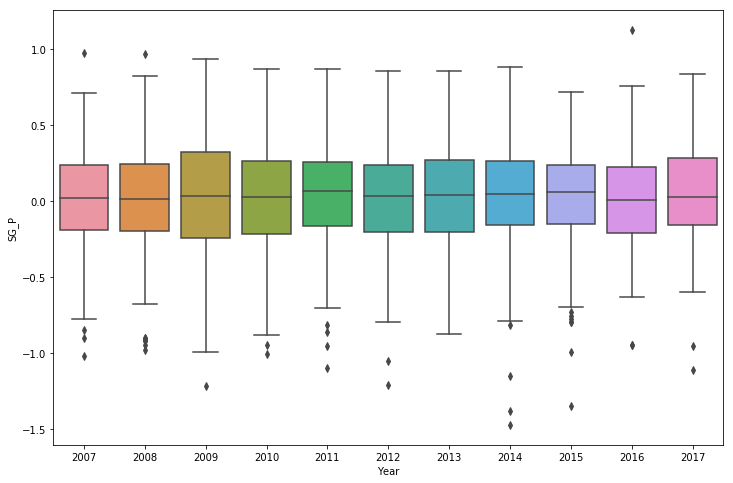

In [186]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='SG_P', data=df)

In [104]:
avg_SGP = df.groupby('Year').mean()['SG_P']
print('--- Average Strokes Gained Putting For Each Year ---')
avg_SGP

--- Average Strokes Gained Putting For Each Year ---


Year
2007    0.023205
2008    0.020964
2009    0.017148
2010    0.008667
2011    0.037730
2012    0.018402
2013    0.034190
2014    0.013795
2015    0.011503
2016    0.024717
2017    0.037739
Name: SG_P, dtype: float64

Observations: Average strokes gained putting have remained relatively consistnet over time. 

### Strokes Gained Tee To Green Over Time

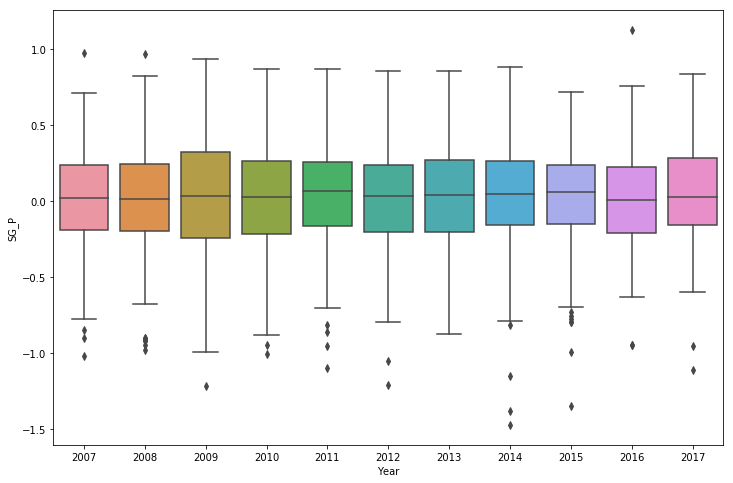

In [100]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='SG_P', data=df)

In [103]:
avg_SGTTG = df.groupby('Year').mean()['SG_TTG']
print('--- Average Strokes Gained Tee To Green For Each Year ---')
avg_SGTTG

--- Average Strokes Gained Tee To Green For Each Year ---


Year
2007    0.135785
2008    0.107335
2009    0.137863
2010    0.103894
2011    0.111524
2012    0.133709
2013    0.099950
2014    0.184619
2015    0.140306
2016    0.135283
2017    0.133809
Name: SG_TTG, dtype: float64

Observations: Average strokes gained tee to green have remained relatively consistnet over time. 

### Total Strokes Gained Over Time

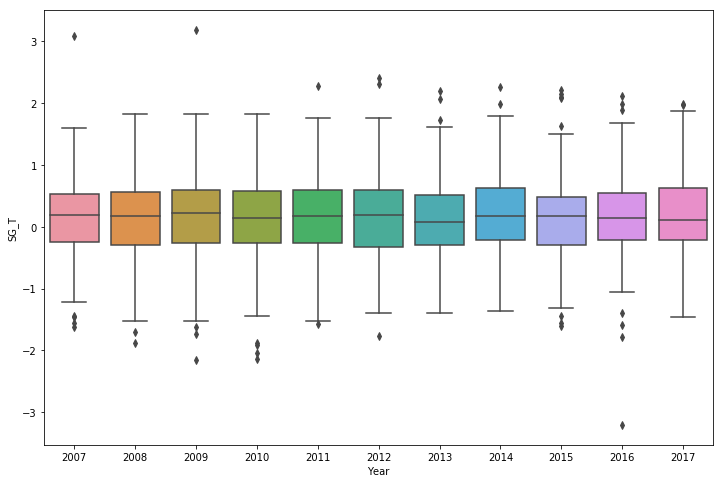

In [105]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='SG_T', data=df)

In [106]:
avg_SGT = df.groupby('Year').mean()['SG_T']
print('--- Average Total Strokes Gained For Each Year ---')
avg_SGT

--- Average Total Strokes Gained For Each Year ---


Year
2007    0.158913
2008    0.128845
2009    0.155044
2010    0.112683
2011    0.149173
2012    0.152201
2013    0.134190
2014    0.198381
2015    0.151732
2016    0.160005
2017    0.171543
Name: SG_T, dtype: float64

Observations: Average Total Strokes gained has remained relatively consistent over time. This should not come as a surprise as total strokes gained is a linear combination of the strokes gained tee to green and strokes gained putting statistics.

### PGA Tour Earnings Over Time

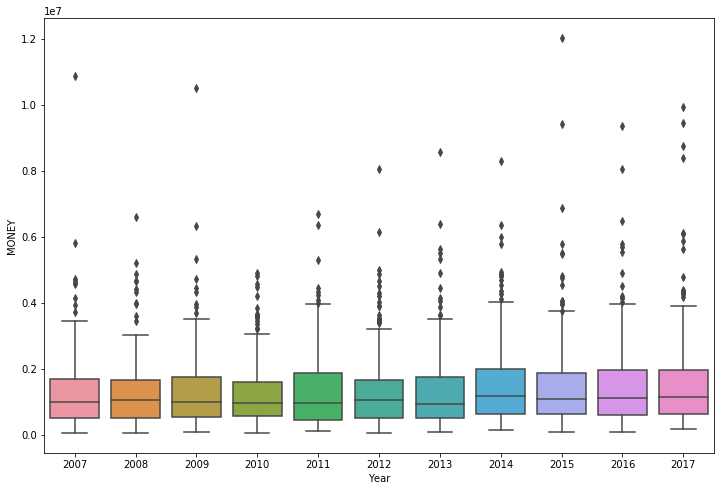

In [109]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='MONEY', data=df)

In [110]:
avg_money = df.groupby('Year').mean()['MONEY']
print('--- Average PGA Tour Earnings For Each Year ---')
avg_money

--- Average PGA Tour Earnings For Each Year ---


Year
2007    1.305958e+06
2008    1.298769e+06
2009    1.326585e+06
2010    1.274941e+06
2011    1.345127e+06
2012    1.373642e+06
2013    1.354520e+06
2014    1.577034e+06
2015    1.556128e+06
2016    1.564778e+06
2017    1.653487e+06
Name: MONEY, dtype: float64

Observations: Wow, I want to be a PGA tour player! The average player earned 1.65 million dollars in 2017. This is a jump from 1.3 million in 2007, an increase in almost 300,000. That's a 30,000/year raise. Not too shabby.

### Top 5 Countries represented on PGA tour each year

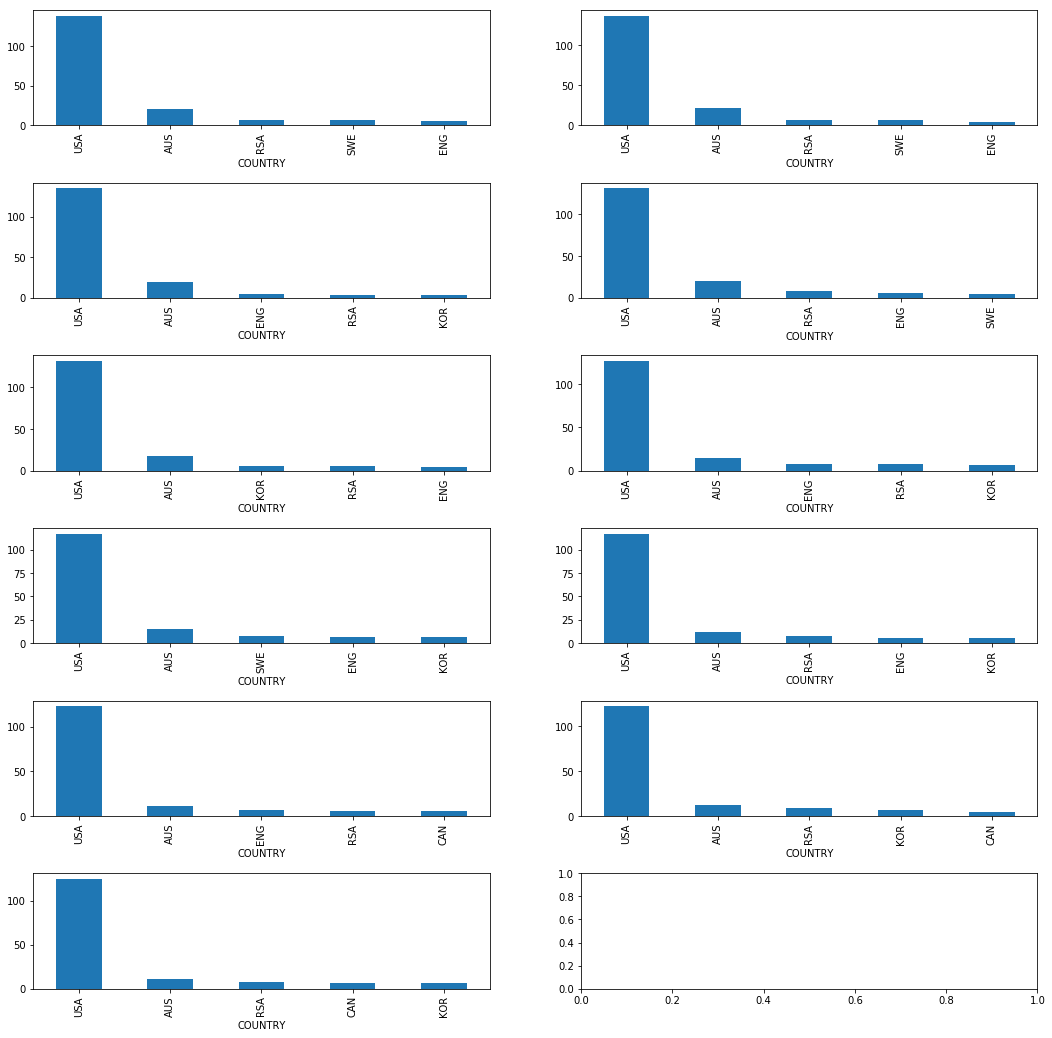

In [185]:
countries_by_year = df.groupby(['Year', 'COUNTRY'])['NAME'].count().groupby(level='Year').nlargest(5).reset_index(level=0, drop=True)

years = df['Year'].unique().tolist()
    

f, ax = plt.subplots(nrows = 6, ncols = 2, figsize=(18,18))
row = 0
col = 0
for i, year in enumerate(years):
    countries_by_year.loc[year].plot(kind='bar', ax=ax[row][col])
    col += 1
    if col == 2:
        col = 0
        row += 1
        
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.5)


                                                                    

Observations: We can see the PGA tour is mainly represented by golfers from the USA as they have the most golfers on tour each year. Australia has the second most golfers on tour each year. The 3rd-5th most golfers on tour for each year varies from year to year, including England, Sweden, South Africa, Canada and Korea.

# 4. <a id='section_4'>Exploratory Data Analysis - Relationships between features</a>
<a href='#TOC'>Back to table of Contents</a>

Now I'm going to take a look at the relationships between various features in the data.


### Correlation Heatmap of Numeric Features

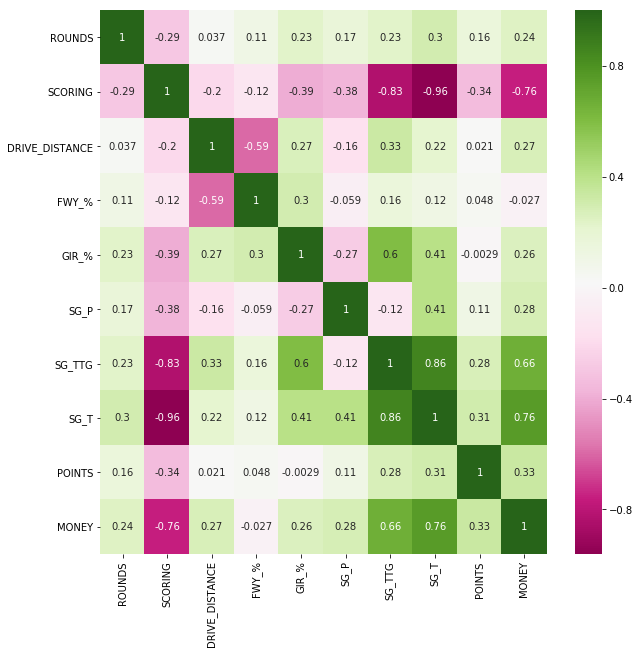

In [192]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='PiYG')

This heatmap shows the correlations between all numeric features in the dataset. The more green the box, the larger the positive correlation between the two features. The more pink the box, the more negatively correlated the features are. The largest absolute value correlation there can be is 1 so the closer the absolute value of the correlation value is to 1, the stronger the correlation. Let's note a couple of them.

<ul>

<li>DRIVE_DISTANCE and FWY_%: -0.59, This is indicating that as fairway's hit % increases, driving distance tends to decrease, or as driving distance increases, fairways hit % tends to decrease.</li>
<li>SCORING and SG_T: -0.96, This is almost a perfect negative correlation between strokes gained total and scoring. This indicates that as Scoring average increases, Total strokes gained tends to decrease and vice versa. This intuitively makes sense because the Strokes gained total statistic is the per round average of the number of strokes a player was better or worse than the field at a particular event. If a player is scoring worse than his strokes gained statistic will tend to decline.</li>
<li>SCORING and SG_TTG: -0.83, This is similar to the last correlation. Because the strokes gained total statistic includes the strokes gained tee to green statistic, it makes sense that we see the same direction of correlation but slightly less strong.</li>
<li>SG_TTG and GIR_%: 0.60, This indicates that as the strokes gained tee to green statistic increases then the greens in regulation statistic tends to increase. Inutitively this makes sense because if a player is gaining strokes on the field from tee to green they tend to give themselves more opportunities at birdie than players who are worse than them from tee to green.</li>
<li>SCORING and MONEY: -0.76, This indicates that as scoring average decreases, earnings tend to increase. This makes sense because shooting lower scores leads to better finishes in tournaments and ultimately earning more money.</li>

</ul>

### Impact of Country on Earnings

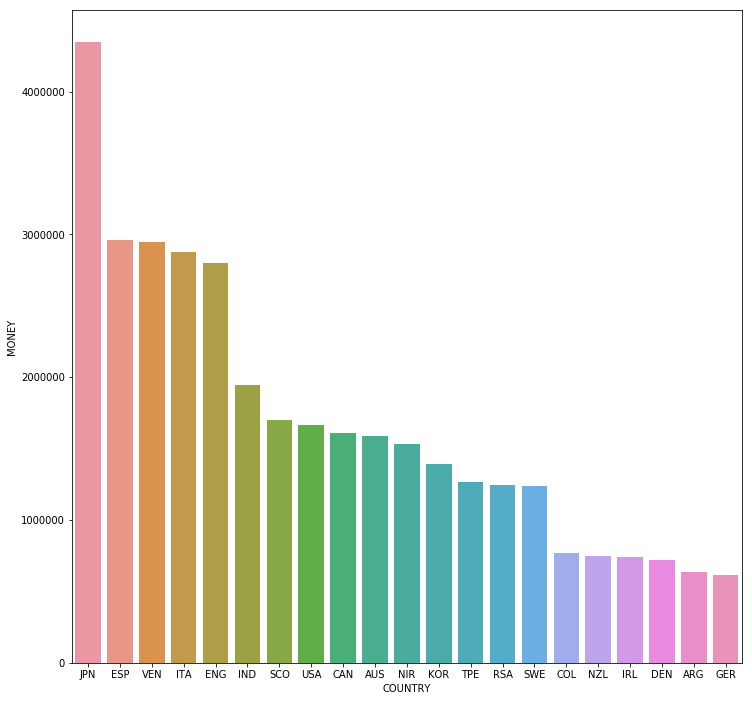

In [204]:
plt.figure(figsize=(12,12))
earnings_by_country = df[df['Year'] == '2017'].groupby('COUNTRY').mean()[['MONEY']].sort_values(by='MONEY', ascending=False).reset_index()
sns.barplot(x='COUNTRY', y='MONEY', data=earnings_by_country)

In [209]:
df[(df['Year'] == '2017') & (df['COUNTRY'] == 'JPN')]

,NAME,ROUNDS,SCORING,DRIVE_DISTANCE,FWY_%,GIR_%,SG_P,SG_TTG,SG_T,POINTS,TOP 10,1ST,Year,MONEY,COUNTRY
1923,Hideki Matsuyama,83,69.624,302.9,57.61,69.14,-0.410,1.469,1.058,1093,7,3,2017,8380570,JPN
2009,Ryo Ishikawa,56,71.990,288.8,51.92,63.29,-0.204,-0.928,-1.132,148,1,0,2017,319748,JPN


We can see that although Japan only has 2 players from the PGA tour, Hideki Matsuyama earned over 8 million dollars in 2017. This is the case for other countries as well, one or two players earn a majority of the money for that country.

In [211]:
df['300+'] = df['DRIVE_DISTANCE'].apply(lambda x: 1 if x >= 300 else 0)
df['Winner'] = df['1ST'].apply(lambda x: 1 if x != '0' else 0)

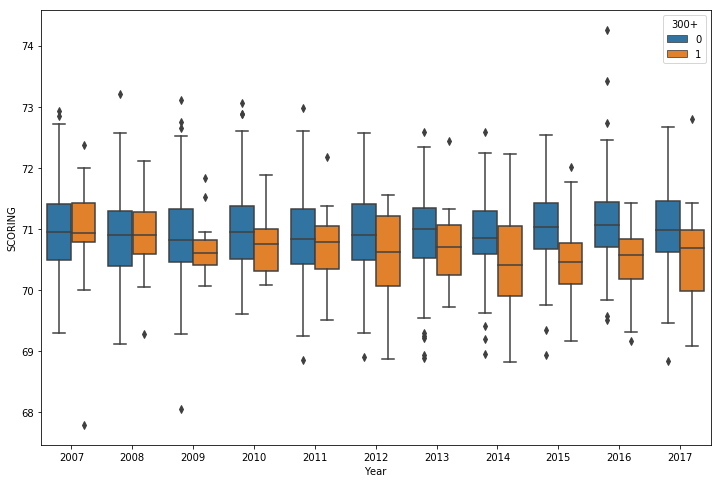

In [213]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = 'Year', y = 'SCORING', hue='300+', data = df)

Observations: Longer drivers tend to have a lower scoring average. I find it surprising that this appears to be the case for pretty muche every year since 2010.

### Fairway % over time separated by tournament and non-tournament winners

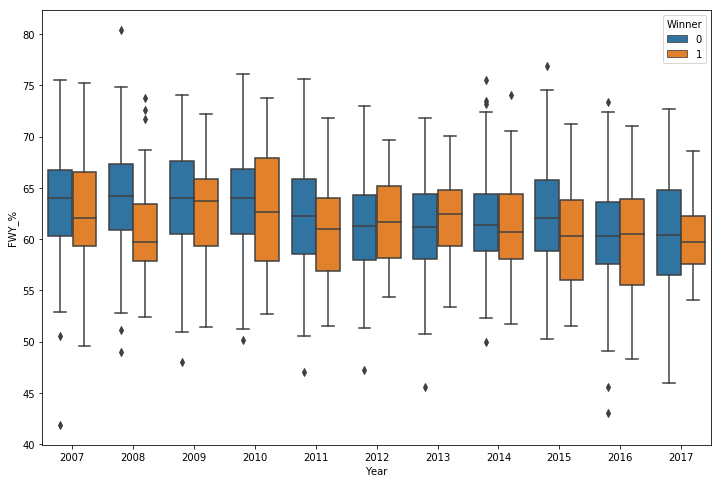

In [215]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Year', y='FWY_%', hue='Winner', data=df)

Observations: There doesn't appear to be a trend with winning tournaments and Fairway %

### Number of individuals who drive the ball over 300 yards for each year in dataset

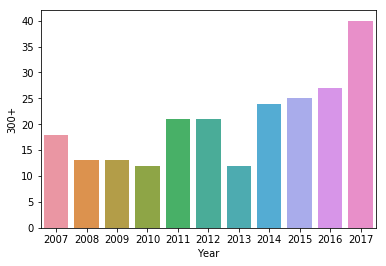

In [216]:
sns.barplot(x = 'Year', y = '300+', data = df.groupby('Year').sum().reset_index())

Observations: Since 2010, the number of individuals who drive the ball over 300 yards on average has increased. What's amazing here is the number of guys who averaged it over 300 in 2016 compared to 2017 differs by a factor of nearly 1.5.

## Boxplots of all numeric columns based on winners and non-winners

In [219]:
df.columns

Index(['NAME', 'ROUNDS', 'SCORING', 'DRIVE_DISTANCE', 'FWY_%', 'GIR_%', 'SG_P',
       'SG_TTG', 'SG_T', 'POINTS', 'TOP 10', '1ST', 'Year', 'MONEY', 'COUNTRY',
       '300+', 'Winner'],
      dtype='object')

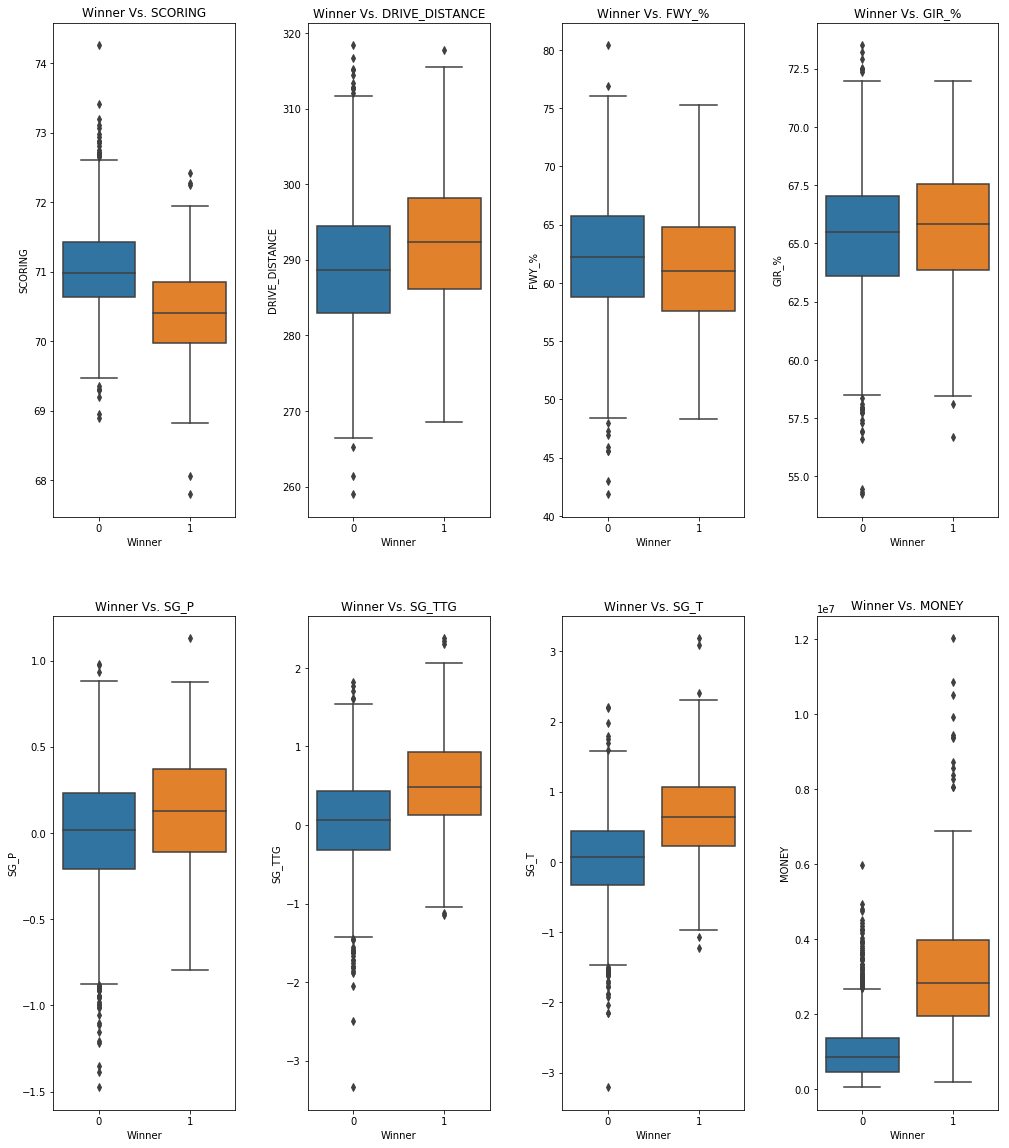

In [222]:
f, ax = plt.subplots(nrows = 2, ncols = 4, figsize=(15,20))
columns = ['SCORING', 'DRIVE_DISTANCE', 'FWY_%', 'GIR_%', 'SG_P',
       'SG_TTG', 'SG_T', 'MONEY']
row = 0
col = 0
for i, column in enumerate(columns):
    g = sns.boxplot(x='Winner', y=column, ax=ax[row][col], data=df)
    g.set(title = "Winner Vs. " + column)
    col += 1
    if col == 4:
        col = 0
        row += 1
        
plt.subplots_adjust(left=None, bottom=None, right=1, top=None, wspace=.4, hspace=None)


In [223]:
df.corr()['Winner']

ROUNDS            0.109296
SCORING          -0.356711
DRIVE_DISTANCE    0.170272
FWY_%            -0.058688
GIR_%             0.046866
SG_P              0.142348
SG_TTG            0.299799
SG_T              0.349794
POINTS            0.214396
MONEY             0.629788
300+              0.137534
Winner            1.000000
Name: Winner, dtype: float64

# More to Come